In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Predict whether a patient is likely to get stroke based on the input parameters.

In [77]:
df = pd.read_csv('stroke_dataset.csv')

In [78]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [79]:
df.shape

(5110, 12)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Feature Engineering

### Checking for null values

In [82]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### BMI has got some nice null values which need to be handled

## Handling Categorical Data

One of the many ways to handle categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [83]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [85]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### Dropping the data having gender as "other" since it will create a feature of constant variance once converted into Categorical form, hence would ultimately be dropped

In [86]:
df.drop(df[df["gender"]=="Other"].index, inplace = True)

In [87]:
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [88]:
# As gender  is  a Nominal Categorical data we will perform OneHotEncoding

Gender= df[["gender"]]

Gender= pd.get_dummies(Gender, drop_first= True)

Gender.head()

,gender_Male
0,1
1,0
2,1
3,0
4,0


In [89]:
# As married or not is a  Nominal Categorical data we will perform OneHotEncoding

Status= df[["ever_married"]]

Status= pd.get_dummies(Status, drop_first= True)

Status.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [90]:
df["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [91]:
# As work_type/employment status is ordinal we will do Label Encoding
df.replace({"Never_worked": 0, "children": 1, "Self-employed": 2, "Private": 3, "Govt_job": 4}, inplace = True)

In [92]:
# As Residence type is a  Nominal Categorical data we will perform OneHotEncoding
Residence= df[['Residence_type']]

Residence= pd.get_dummies(Residence, drop_first= True)

Residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [93]:
# As smoking status is a  Nominal Categorical data we will perform OneHotEncoding
smoker= df[['smoking_status']]

smoker= pd.get_dummies(smoker, drop_first= True)

smoker.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [94]:
### Concatenating these new data frames
df = pd.concat([df, Gender, Status, Residence,smoker], axis = 1)

In [95]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,3,Urban,228.69,36.6,formerly smoked,1,1,1,1,1,0,0
1,51676,Female,61.0,0,0,Yes,2,Rural,202.21,NaN,never smoked,1,0,1,0,0,1,0
2,31112,Male,80.0,0,1,Yes,3,Rural,105.92,32.5,never smoked,1,1,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,3,Urban,171.23,34.4,smokes,1,0,1,1,0,0,1
4,1665,Female,79.0,1,0,Yes,2,Rural,174.12,24.0,never smoked,1,0,1,0,0,1,0


#### Dropping the categorical columns as they have been already encoded

In [96]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [97]:
df.drop(['gender','ever_married','Residence_type','smoking_status'], axis = 1, inplace = True)

In [98]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,3,228.69,36.6,1,1,1,1,1,0,0
1,51676,61.0,0,0,2,202.21,NaN,1,0,1,0,0,1,0
2,31112,80.0,0,1,3,105.92,32.5,1,1,1,0,0,1,0
3,60182,49.0,0,0,3,171.23,34.4,1,0,1,1,0,0,1
4,1665,79.0,1,0,2,174.12,24.0,1,0,1,0,0,1,0


### Checking whether the target class is balanced or not

In [99]:
df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

[Text(0, 0, 'Had a Stroke'), Text(0, 0, 'Did not have a Stroke')]

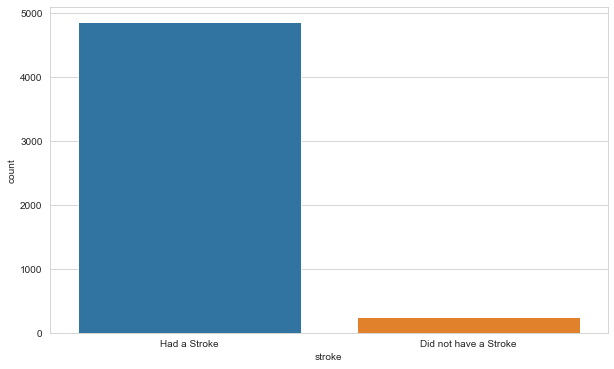

In [100]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="stroke",data=df)
plot.set_xticklabels(["Had a Stroke","Did not have a Stroke"])

#### Seems to be less balanced, going ahead with Over Sampling Technique

### Over Sampling

In [101]:
columns = df.columns.tolist()
columns

['id',
 'age',
 'hypertension',
 'heart_disease',
 'work_type',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Male',
 'ever_married_Yes',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [102]:
X = df[['id',
 'age',
 'hypertension',
 'heart_disease',
 'work_type',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']]
Y = df['stroke']

In [103]:
print(X.shape)
print(Y.shape)

(5109, 13)
(5109,)


In [104]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [105]:
os =RandomOverSampler(sampling_strategy=0.6)

In [106]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [107]:
X_train_res.shape,y_train_res.shape

((7776, 13), (7776,))

In [108]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 4860, 1: 249})
Resampled dataset shape Counter({0: 4860, 1: 2916})


In [109]:
df=X_train_res
df['stroke']=y_train_res

[Text(0, 0, 'Had a Stroke'), Text(0, 0, 'Did not have a Stroke')]

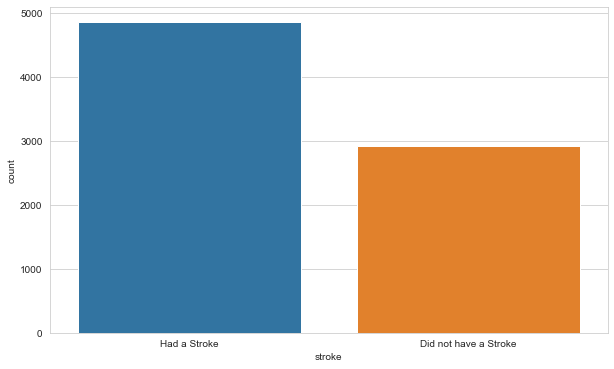

In [110]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="stroke",data=df)
plot.set_xticklabels(["Had a Stroke","Did not have a Stroke"])

In [111]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,67.0,0,1,3,228.69,36.6,1,1,1,1,0,0,1
1,51676,61.0,0,0,2,202.21,NaN,0,1,0,0,1,0,1
2,31112,80.0,0,1,3,105.92,32.5,1,1,0,0,1,0,1
3,60182,49.0,0,0,3,171.23,34.4,0,1,1,0,0,1,1
4,1665,79.0,1,0,2,174.12,24.0,0,1,0,0,1,0,1


## Performing EDA using Panda Profiling

In [50]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Stroke Prediction')
prof_report.to_widgets()

## Feature Engineering

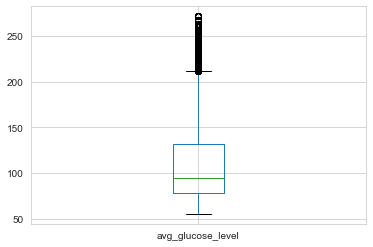

In [112]:
#average glucose level
df.boxplot(column='avg_glucose_level')

In [115]:
IQR=df.avg_glucose_level.quantile(0.75)-df.avg_glucose_level.quantile(0.25)
upper_bridge=df['avg_glucose_level'].quantile(0.75)+(IQR*1.5)
df.drop(df[df['avg_glucose_level']>upper_bridge].index, inplace = True)

## Feature Selection

#### Using Heatmap

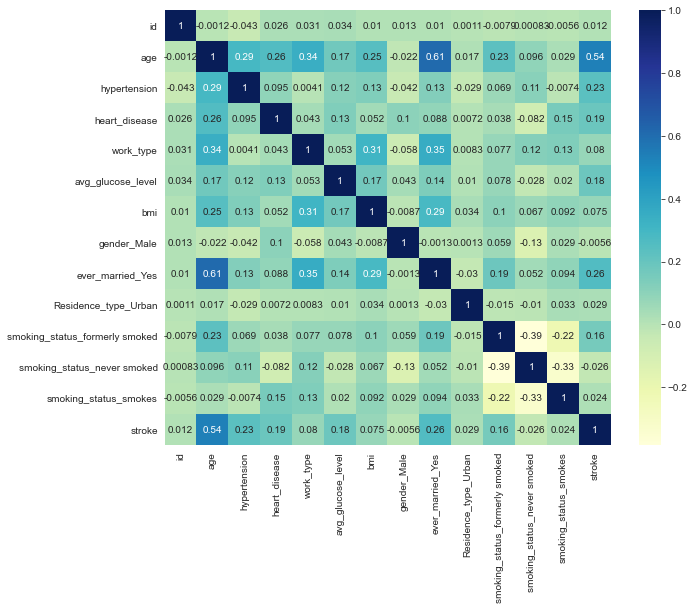

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Index(['id', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')

#### Using Filter method ( X-Square technique) on the attributes

In [121]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['hypertension', 'gender_Male', 'heart_disease', 'work_type','ever_married_Yes','Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']]  #independent columns
y = df['stroke']    #target column

In [125]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [126]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [127]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [128]:
featureScores

,Specs,Score,P-Values
0,hypertension,332.199575,3.189494e-74
1,gender_Male,0.132687,7.156620e-01
2,heart_disease,230.167754,5.479720e-52
3,work_type,11.183253,8.253895e-04
4,ever_married_Yes,136.556044,1.507969e-31
5,Residence_type_Urban,2.932146,8.683202e-02
6,smoking_status_formerly smoked,144.470816,2.803206e-33
7,smoking_status_never smoked,3.134881,7.663400e-02
8,smoking_status_smokes,3.298928,6.932512e-02


#### Each one of them show association with the O/p variable at 95% level of significance

## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

In [244]:
x=df[['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

In [245]:
y=df["stroke"]

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [248]:
mean_bmi=x_train["bmi"].mean()

In [249]:
x_train["bmi"]=x_train["bmi"].fillna(value=mean_bmi)
x_test["bmi"]=x_test["bmi"].fillna(value=mean_bmi)

### K Neighbors Classifier

In [150]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [167]:
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)

In [168]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

In [171]:
knn_scores

[0.9654839428439999,
 0.9641563883617964,
 0.9304000632511068,
 0.9283152923926169,
 0.8991098125467196,
 0.8936116382036687,
 0.8761651141394975,
 0.8718036628140992,
 0.8545476108331895,
 0.8481003105054338,
 0.832168219193836,
 0.8253428497498707,
 0.8173768040940717,
 0.8088400609510668,
 0.8020121758380773,
 0.8016297941463975,
 0.798785650623886,
 0.7997347766085906,
 0.798029871772756,
 0.7883549680869415,
 0.788166652291415,
 0.7815317549307113,
 0.778113679489391,
 0.7800112126962222,
 0.7786847363578863,
 0.7750808607900639,
 0.7743240037950665,
 0.7718579293887643,
 0.7731851244896786]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

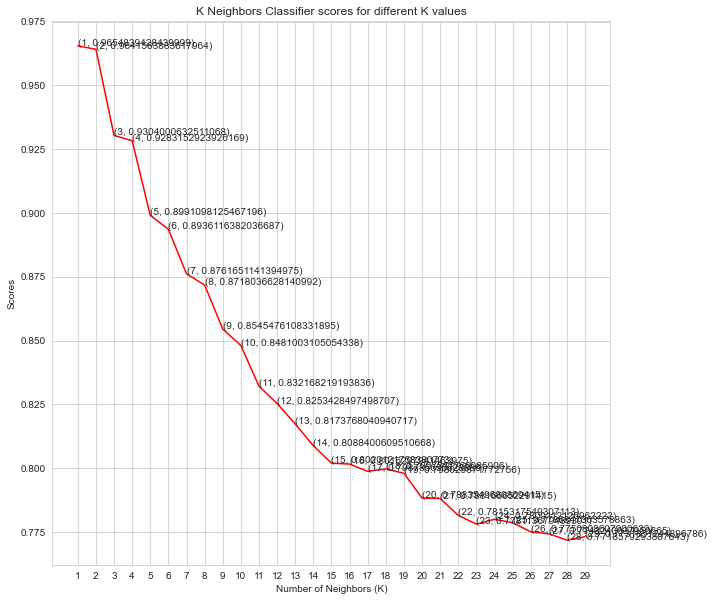

In [172]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [169]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [170]:
error_rate

[0.03981797497155859,
 0.04323094425483504,
 0.07337883959044368,
 0.0745164960182025,
 0.1012514220705347,
 0.1012514220705347,
 0.12627986348122866,
 0.13083048919226395,
 0.14675767918088736,
 0.149032992036405,
 0.16382252559726962,
 0.16666666666666666,
 0.18145620022753128,
 0.1831626848691695,
 0.19795221843003413,
 0.2025028441410694,
 0.20762229806598406,
 0.19681456200227532,
 0.19852104664391354,
 0.19340159271899887,
 0.19852104664391354,
 0.20136518771331058,
 0.20136518771331058,
 0.20193401592718999,
 0.19852104664391354,
 0.20819112627986347,
 0.21160409556313994,
 0.22127417519908987,
 0.22696245733788395]

Text(0.5, 1.0, 'Error rate for different K values')

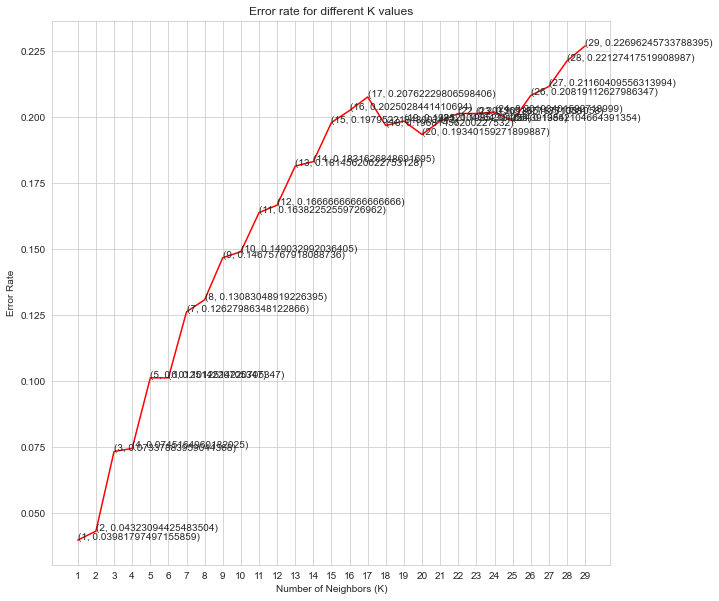

In [173]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)],error_rate, color = 'red')
for i in range(1,30):
    plt.text(i, error_rate[i-1], (i, error_rate[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error rate for different K values')

#### k=2 could be an ideal choice as it gives less error rate and more accuracy

In [174]:
knnclassifier = KNeighborsClassifier(n_neighbors=2)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9567690557451649

In [175]:
print(confusion_matrix(y_test,y_pred))

[[1111   70]
 [   6  571]]


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1181
           1       0.89      0.99      0.94       577

    accuracy                           0.96      1758
   macro avg       0.94      0.97      0.95      1758
weighted avg       0.96      0.96      0.96      1758



### Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
#Run th split cell again

In [185]:
clf = DecisionTreeClassifier(random_state=101)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [186]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9732650739476678

In [187]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [189]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12342221554978672


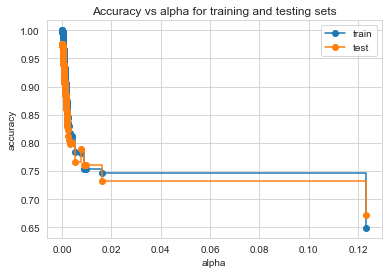

In [191]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [196]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0001)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, random_state=0)

In [197]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9755403868031854

In [198]:
print(confusion_matrix(y_test,pred))

[[1138   43]
 [   0  577]]


In [199]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1181
           1       0.93      1.00      0.96       577

    accuracy                           0.98      1758
   macro avg       0.97      0.98      0.97      1758
weighted avg       0.98      0.98      0.98      1758



### RandomForestClassifier

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Run the split cell again

In [206]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)     #Utilizes all the cores of the CPU
rf_p_dist={'max_depth':[3,5,10,None],    #None means till full depth
              'n_estimators':[10,100,200,300,400,500],   # Number of Decision Trees
              'max_features':randint(1,13),   # AS I have 10 features
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [207]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):   #p_distr is the different set of parameters
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [ ]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, x, y)

In [212]:
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 3,
 'n_estimators': 400}

In [214]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= False,criterion='gini',max_depth=None,max_features=8,min_samples_leaf= 3)

In [215]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=8, min_samples_leaf=3,
                       n_estimators=400, n_jobs=-1)

In [216]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[1154   27]
 [   6  571]]
0.9812286689419796


In [217]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1181
           1       0.95      0.99      0.97       577

    accuracy                           0.98      1758
   macro avg       0.97      0.98      0.98      1758
weighted avg       0.98      0.98      0.98      1758



### Logisitic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [224]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.780456 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.776472 (0.013096) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777926 (0.015757) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777104 (0.013498) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.776472 (0.013096) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776346 (0.014339) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.776851 (0.013499) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.776661 (0.013107) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.778558 (0.016411) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777926 (0.014225) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.778052 (0.012904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777675 (0.014813) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.775903 (0.014280) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.779698 (0.013255) with: 

In [ ]:
#Run the split cell once

In [233]:
logisticRegr = LogisticRegression(C=0.01,penalty="l2",solver='lbfgs')

In [234]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [235]:
predictions = logisticRegr.predict(x_test)

In [236]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[988 193]
 [175 402]]


In [237]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1181
           1       0.68      0.70      0.69       577

    accuracy                           0.79      1758
   macro avg       0.76      0.77      0.76      1758
weighted avg       0.79      0.79      0.79      1758



### SVM

In [238]:
from sklearn.svm import SVC
model = SVC()

In [239]:
#Run the split cell once

In [240]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [250]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   4.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   4.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   4.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.702 total time=   4.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=   4.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   4.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   4.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   4.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   4.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   3.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.810 total time=   1.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   3.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.999 total time=   3.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   3.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   3.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.976 total time=   2.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.985 total time=   2.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.982 total time=   2.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.983 total time=   2.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.978 total time=   2.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.936 total time=   2.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.951 total time=   2.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.955 total time=   2.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [251]:
model=SVC(C=1,gamma=1,kernel="rbf")

In [252]:
model.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [253]:
predictions = model.predict(x_test)

In [254]:
print(confusion_matrix(y_test,predictions))

[[1181    0]
 [   0  577]]


In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



## FINAL MODEL SELECTED- SVM Model (rbf kernel)

In [256]:
from sklearn.svm import SVC
model = SVC()

In [257]:
x=df[['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]
y=df["stroke"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)
mean_bmi=x_train["bmi"].mean()
x_train["bmi"]=x_train["bmi"].fillna(value=mean_bmi)
x_test["bmi"]=x_test["bmi"].fillna(value=mean_bmi)

In [259]:
model=SVC(C=1,gamma=1,kernel="rbf")
model.fit(x_train,y_train)
predictions = model.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1181    0]
 [   0  577]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

